In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load file into notebook
df_original=pd.read_csv('prosperLoanData.csv')

In [3]:
# Right after loading the data, it's a good idea to work on a copy
df = df_original.copy()

# Exploring some hypothesis:

#### I  used the information gathered from .info, .head. and .describe

#### I plan to focus in the following areas:
- What are the popular reasons why people ask for loans (Listing Category)
- Do Prosper clients' have a good credit grading?
- Can we profile the type of most profitable client?
- And, can we profile the type of client that might default?
- How large are the amounts of loans? 
- Is there a correlation between certain variables?
- Is the location of a borrower a factor of whether or not they are good clients?

#### By exploring the above areas I hope to build a set of interestign hypothesis and provide later on an explanatory analysis with some insights.

In [4]:
# First glance at dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [5]:
# Just a quick visual check on the headers and rows:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [6]:
# Some basic stats, not quite clean as some fields might not even make sense, but a quick glance at the stats:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


## Data cleaning, some variables need to be changed to the correct data type:

### CreditGrade should be qualitative ordinal:

In [10]:
# I'm basing the order from: https://www.mcgill.ca/economics/files/economics/ravina.pdf
df.CreditGrade.value_counts()

C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
NC     141
Name: CreditGrade, dtype: int64

In [11]:
# Code to change datatype to ordinal:
ordinal_var = {'CreditGrade': ['AA','A','B','C','D', 'E', 'HR', 'NC']}

for var in ordinal_var:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var[var])
    df[var] = df[var].astype(ordered_var)

In [12]:
# I validate the variable has been changed:
df['CreditGrade'].dtype


CategoricalDtype(categories=['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'NC'], ordered=True)

### There are 4 variables that should be changed to datetime:
#### ListingCreationDate, ClosedDate, DateCreditPulled, LoanOriginationDate

In [13]:
# Code to change datatype to datetime for the four variables using .apply:
df[['ListingCreationDate','ClosedDate', 'DateCreditPulled', 'LoanOriginationDate']] = df[['ListingCreationDate','ClosedDate', 'DateCreditPulled', 'LoanOriginationDate']].apply(pd.to_datetime, format='%Y-%m-%d %H:%M:%S.%f')

In [14]:
# I validate the variables have been changed:
print(df['ListingCreationDate'].dtype)
print(df['ClosedDate'].dtype)
print(df['DateCreditPulled'].dtype)
print(df['LoanOriginationDate'].dtype)

datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]


In [8]:
df['ListingCategory (numeric)'].value_counts()

1     58308
0     16965
7     10494
2      7433
3      7189
6      2572
4      2395
13     1996
15     1522
18      885
14      876
20      771
19      768
5       756
16      304
11      217
8       199
10       91
9        85
12       59
17       52
Name: ListingCategory (numeric), dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null datetime64[ns]
CreditGrade                            28953 non-null category
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null datetime64[ns]
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
Pros

# Exploratory univariate visualizations:
## In the following visualizations I explore possible hypothesis and insights from single variables

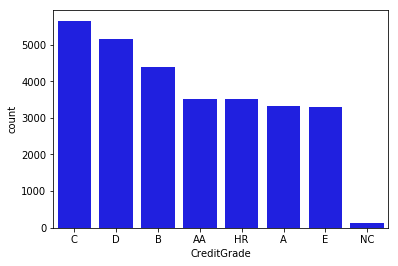

In [16]:
# The below bar chart shows that AA credit grades are not the most common, the majority are C and D
grade_order=df['CreditGrade'].value_counts().index
sns.countplot(data=df, x='CreditGrade', color='blue', order=grade_order);

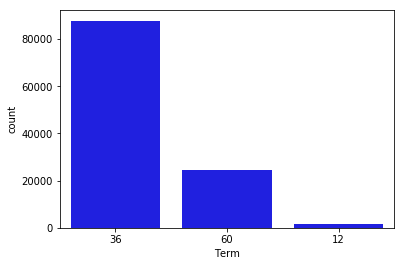

In [17]:
# The most popular term of the loans seem to be 36 months. I can see there are only 3 lenghts of terms (12, 36 and 60)
term_order=df['Term'].value_counts().index
sns.countplot(data=df, x='Term', color='blue', order=term_order);

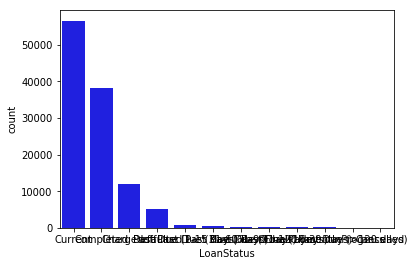

In [18]:
# Here I plot the loan status:
status_order=df['LoanStatus'].value_counts().index
sns.countplot(data=df, x='LoanStatus', color='blue', order=status_order);
# The X axis labels look horrible, let's swap the axes

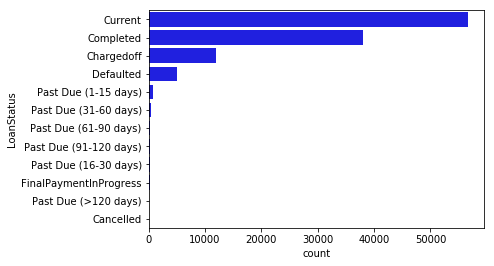

In [19]:
# The Y axis is better in this case, converting it to a horizontal bar chart
status_order=df['LoanStatus'].value_counts().index
sns.countplot(data=df, y='LoanStatus', color='blue', order=status_order);


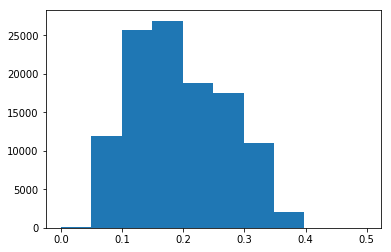

In [20]:
# A somewhat normal distribution is seen in this histogram of the borrower rate
plt.hist(data=df, x='BorrowerRate');

In [21]:
# Just to dig a bit deeper I run the .describe method, it might be interesting to explore the MAX and MIN observations
print(df['BorrowerRate'].describe())

# This would be the mode:
print(df['BorrowerRate'].mode())

# This would be the median:
print(df['BorrowerRate'].median())

# The median and mean are very similar, which confirms the shape of the distribution.
# The SD is not that big, with only .074 in interest rate difference this might be due to a competitive market

count    113937.000000
mean          0.192764
std           0.074818
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250000
max           0.497500
Name: BorrowerRate, dtype: float64
0    0.3177
dtype: float64
0.184


/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


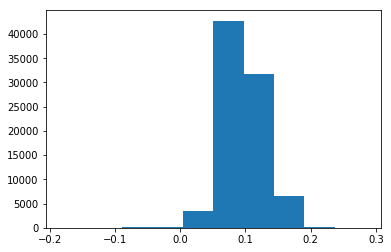

In [22]:
# Here the estimated return is a percentage
# The definition is: "the difference between the Estimated Effective Yield and the Estimated Loss Rate"
plt.hist(data=df, x='EstimatedReturn');
# The histogram doesn't shed much insight as the bin sizes are relatively too large

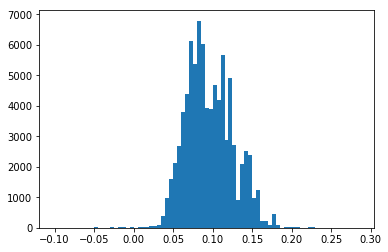

In [23]:
# Here I'm reducing the size of the bins, while also removing the outliers
binsize = .005
bins = np.arange(-0.1, df['EstimatedReturn'].max()+binsize, binsize)
plt.hist(data=df, x='EstimatedReturn', bins=bins);
# This histogram gleams more of a story than the previous one

In [24]:
# I added a new column under the name ListingCategory to replace the original name 'ListingCategory (numeric)'
# This because the column header has a space and parentheses
# Then I drop the original column
df['ListingCategory'] = df['ListingCategory (numeric)']
df.drop(['ListingCategory (numeric)'], axis=1, inplace=True)

In [25]:
# The top five categories of listings are codes: 1, 0, 7, 2 and 3
# Definition to those are: Debt consolidation, Not available, Other, Home Improvement and Business, respectively
df.ListingCategory.value_counts()

1     58308
0     16965
7     10494
2      7433
3      7189
6      2572
4      2395
13     1996
15     1522
18      885
14      876
20      771
19      768
5       756
16      304
11      217
8       199
10       91
9        85
12       59
17       52
Name: ListingCategory, dtype: int64

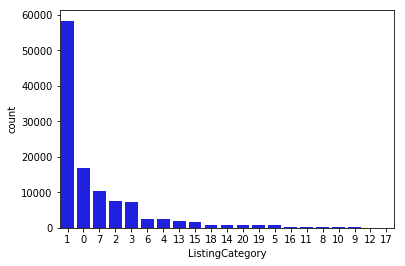

In [26]:
# Visually, it's impressive the magnitude of difference between the first listing category against the rest
listing_order=df['ListingCategory'].value_counts().index
sns.countplot(data=df, x='ListingCategory', color='blue', order=listing_order);


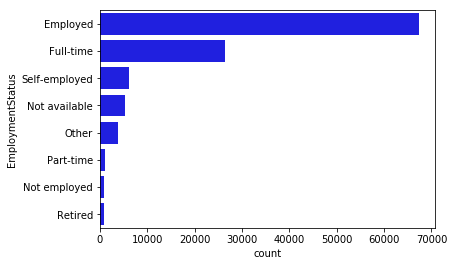

In [27]:
# Now let's check the employment status
# It makes sense to lend to individuals with a secured income, as seen below:
employ_order=df['EmploymentStatus'].value_counts().index
sns.countplot(data=df, y='EmploymentStatus', color='blue', order=employ_order);

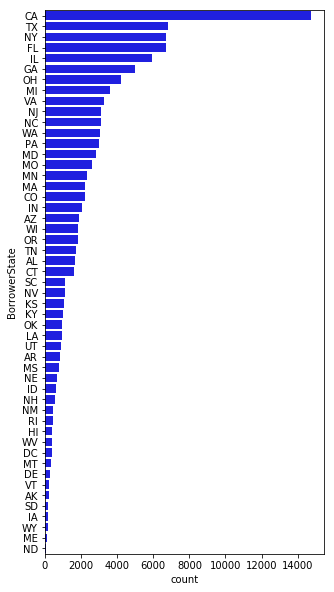

In [32]:
# Another univariate analysis could be the borrower State, it seems like the pattern follows the general population
# density of the United States
state_order=df['BorrowerState'].value_counts().index
plt.figure(figsize=(5,10))
sns.countplot(data=df, y='BorrowerState', color='blue', order=state_order);

# Exploratory bivariate visualizations:
## In the following visualizations I explore possible hypothesis and insights from two variables

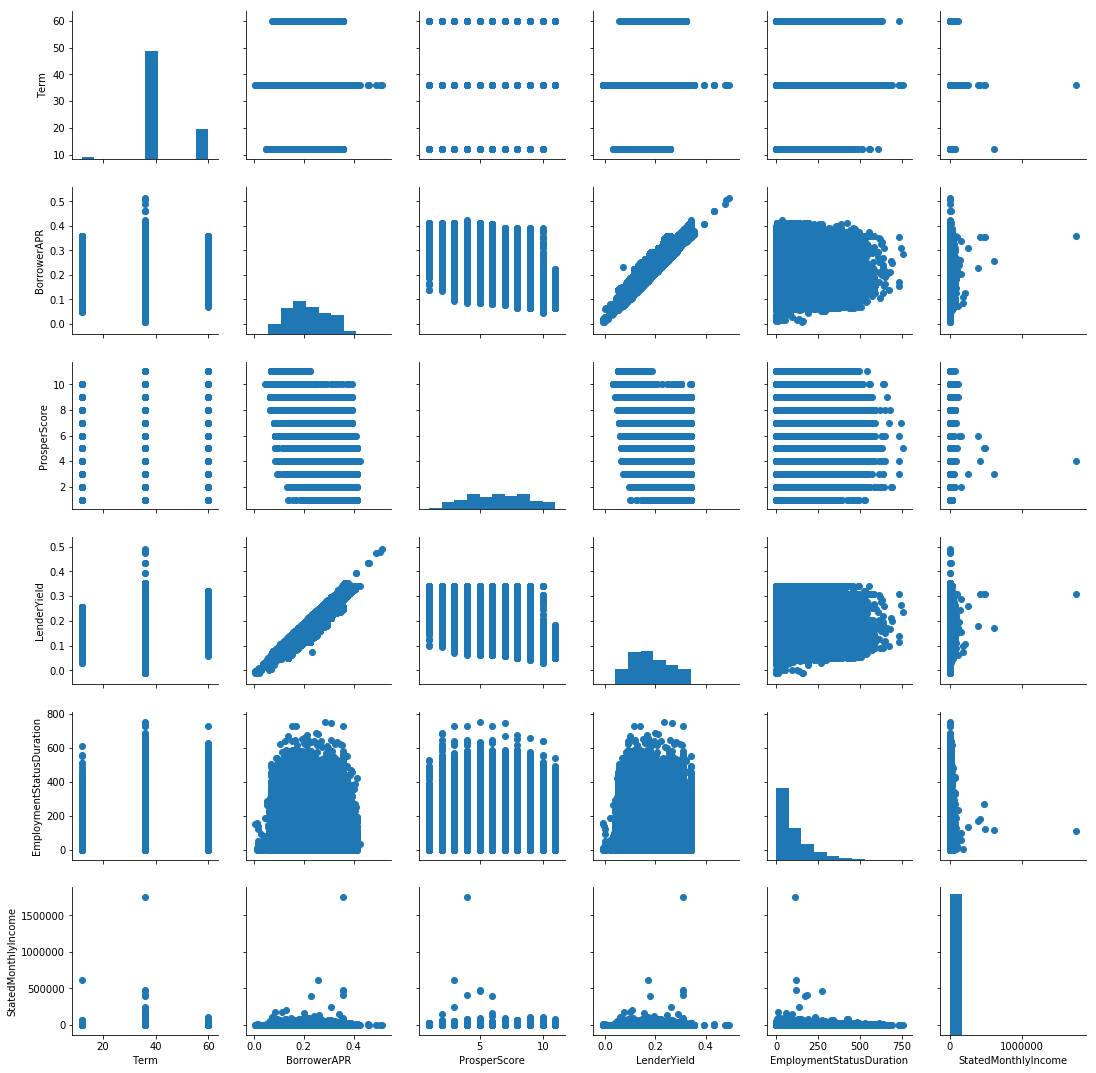

In [33]:
# A seaborn PairGrid (plot matrix) can provide a quick visual approach to some of the numerical variables of interest
g=sns.PairGrid(data=df, vars= ['Term', 'BorrowerAPR', 'ProsperScore', 'LenderYield', 'EmploymentStatusDuration', 'StatedMonthlyIncome'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

# I noted some outliers in the StatedMonthlyIncome; and expected positive correlation between BorrowerAPR and 
# LenderYield; I'd like to further explore the EmploymentStatusDuration variable against other variables, among
# other interesting insights.

In [37]:
# I can also create a correlation plot with categorical variables vs. numerical variables
# Using seaborn heatmap method
# First I will convert the Term, ListingCategory, EmploymentStatus to categorical datatype as it makes more sense
df["Term"] = df["Term"].astype('category')
df["ListingCategory"] = df["ListingCategory"].astype('category')
df["EmploymentStatus"] = df["EmploymentStatus"].astype('category')


In [52]:
# Test if variable datatypes were changed:
print(df['Term'].dtype)
print(df['ListingCategory'].dtype)
print(df['EmploymentStatus'].dtype)

category
category
category


In [43]:
# I will create a correlation plot with a heatmap method to have somo color diversion and the correlation values
# Then I create variables containing numeric variables
num_vars = ['EstimatedReturn', 'EstimatedLoss', 'BorrowerRate', 'ProsperRating (numeric)','StatedMonthlyIncome', 'ProsperPrincipalBorrowed', 'OnTimeProsperPayments']

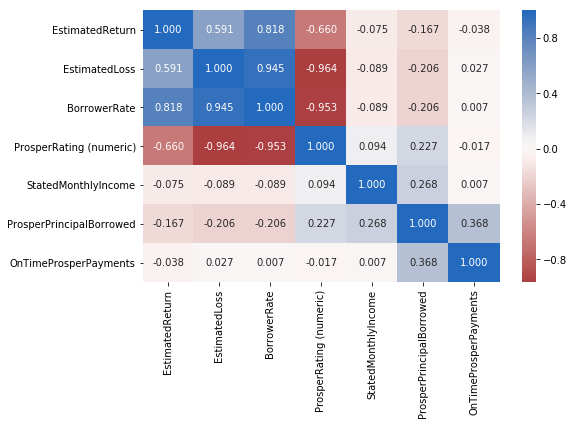

In [53]:
# Then the correlation plot
plt.figure(figsize = [8, 5])
sns.heatmap(df[num_vars].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
plt.show()

#### It's interesting to see how from the chosen numerical variables there are some with a strong positive correlation
As expected, like the higher borrower rate should mean a better estimated return, although it also has a high correlation to the estimated loss.
Another expected result was the ProsperRating (where a higher value means a better credit rate), so there's a strong negative correlation there with the estimated loss and the borrower rate.

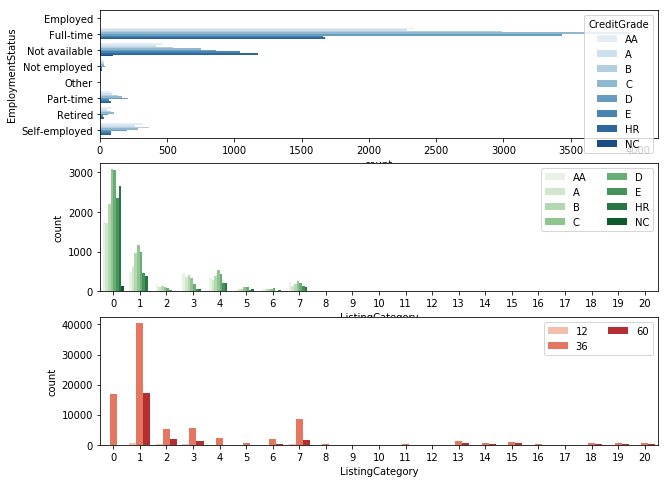

In [169]:
# Here I create 3 subplot of different categorical variables
plt.figure(figsize = [10, 8])

# subplot 1: EmploymentStatus vs CreditGrade
plt.subplot(3, 1, 1)
sns.countplot(data = df, y = 'EmploymentStatus', hue = 'CreditGrade', palette = 'Blues')


# subplot 2: ListingCategory vs. CreditGrade, use different color palette
ax = plt.subplot(3, 1, 2)
sns.countplot(data = df, x = 'ListingCategory', hue = 'CreditGrade', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

# subplot 3: ListingCategory vs. Term, use different color palette
ax = plt.subplot(3, 1, 3)
sns.countplot(data = df, x = 'ListingCategory', hue = 'Term', palette = 'Reds')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

plt.show()

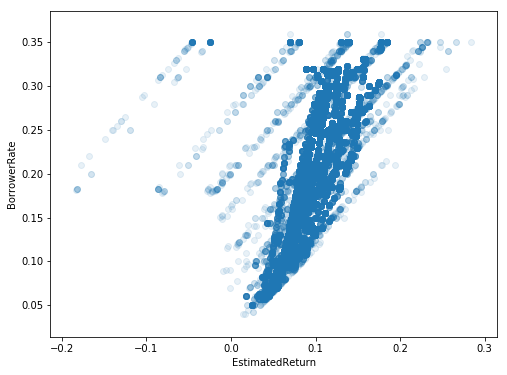

In [88]:
# scatter plot of EstimatedReturn vs. BorrowerRate, with log transform on price axis

plt.figure(figsize = [8, 6])
plt.scatter(data = df, x = 'EstimatedReturn', y = 'BorrowerRate', alpha = 1/10)
plt.xlabel('EstimatedReturn')
plt.ylabel('BorrowerRate')
plt.show()

# Exploratory multi-variate visualizations:
## In the following visualizations I explore possible hypothesis and insights from three variables

Text(0, 0.5, 'BorrowerRate')

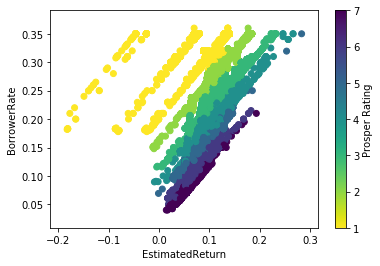

In [92]:
# I have a scatter plot with 3 numeric variables in the X and Y axis (same as presented in the bivariate section)
# Plus adding a categorical variable Prosper Rating

plt.scatter(data = df, x = 'EstimatedReturn', y = 'BorrowerRate', c = 'ProsperRating (numeric)', cmap='viridis_r')
plt.colorbar(label = 'Prosper Rating')
plt.xlabel('EstimatedReturn')
plt.ylabel('BorrowerRate')

# Interesting to see that higher Prosper Ratings do tend to be on the right side of the chart, while the best 
# borrower rates do coincide with having a good Prosper Rating and not such a higher level of Estimated Return 

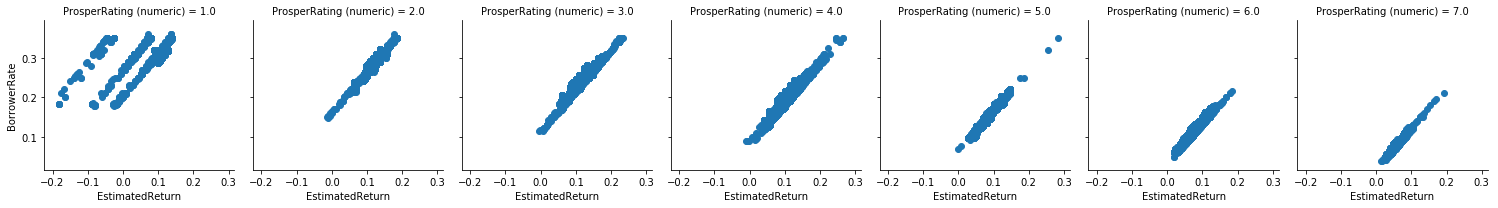

In [93]:
# Another way to dissect the above chart is by using FacetGrid of multiple bivariate scatterplots
g = sns.FacetGrid(data = df, col = 'ProsperRating (numeric)', margin_titles = True)
g.map(plt.scatter, 'EstimatedReturn', 'BorrowerRate');

# This chart is clearer as it depicts in each of the 7 categories of Prospec Rating
# Interesting to see how the perfectly positive correlation tends to move from the upper left quadrant to the
# lower right quadrant

In [143]:
# Feature engineer: Average EstimatedReturn per state

return_state = df.groupby('BorrowerState')['EstimatedReturn'].mean().sort_values(ascending=False)

In [144]:
# Converting this series to a dataframe
return_state.to_frame()

,EstimatedReturn
BorrowerState,
AL,0.100884
SD,0.100442
TN,0.100054
MS,0.100012
AR,0.098999
MO,0.098945
WV,0.098895
KY,0.098734
MD,0.098551


In [165]:
# EstimatedReturn per state stats
return_state.describe()

count    48.000000
mean      0.096443
std       0.002239
min       0.091413
25%       0.095031
50%       0.096493
75%       0.098240
max       0.100884
Name: EstimatedReturn, dtype: float64

In [168]:
#range very low range and variability
return_state.max()-return_state.min()

0.009470152182176561

(0.09, 0.105)

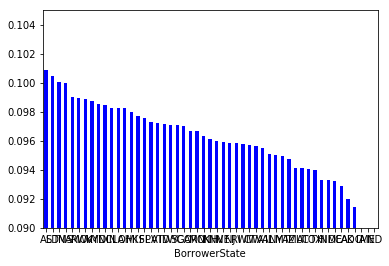

In [163]:
# A simple bar chart to plot all results and search for insights
return_state.plot.bar(y='BorrowerState', x='EstimatedReturn', rot = 0, color='blue');
plt.ylim(.09, .105)
# Note: I modified the y axis scale

In [160]:
# I'd like to explore the bottom 20 states
bottom20 = return_state.tail(20)

(0.09, 0.105)

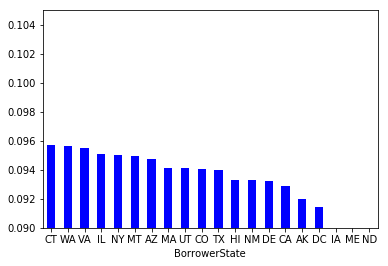

In [164]:
# The bottom 20 states have very little variability too.
bottom20.plot.bar(y='BorrowerState', x='EstimatedReturn', rot = 0, color='blue');
plt.ylim(.09, .105)